# Motor Parameters

This hyperopt function looks for the right values for the feedback connection strengths in the motor system. 

In [1]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [2]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from 'vision_benchmarks.pyc'>

In [ ]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        motor_feedback = x['motor_feedback'],
        motor_transform = x['motor_transform'],
        finger_feedback = x['finger_feedback'],
        motor_to_fingers_strength = x['motor_to_fingers_strength']
    )
    return {
        'loss': 
            abs(vals['MC_to_finger'] - 0.025) + abs(vals['finger_to_end'] - 0.03) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {'motor_feedback': hp.uniform('motor_feedback', 0, 1),
                     'motor_transform': hp.uniform('motor_transform', 0, 1),
                     'finger_feedback': hp.uniform('finger_feedback', 0, 1),
                     'motor_to_fingers_strength': hp.uniform('motor_to_fingers_strength', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('motor_hyperopt_data', 'w'))

In [22]:
best =  pickle.load(open ('motor_hyperopt_data', 'r'))

# motor transform was initially 10 - investigate this
print(best)

{'Trials': <hyperopt.base.Trials object at 0x7ff98f0746d0>, 'Best': {'motor_transform': 0.6695907794784146, 'motor_to_fingers_strength': 0.907574651630474, 'finger_feedback': 0.07839757841518613, 'motor_feedback': 0.6679273806561052}}


In [23]:
data3 = pickle.load(open('motor_hyperopt_data','r'))

In [24]:
import pandas
import seaborn as sns

In [25]:
data3 = ctn_benchmark.Data('data')
df = pandas.DataFrame(data3.data)

In [31]:
df = df[df._AIT_V1_strength == 0.06848695023305285] 
df = df[df._result_feedback == 0.4195086163487056]
df = df[df._motor_transform <= 1.0]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
3,0.022,-0.062,0.02,-0.007,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.071503,0.549904,0.420041,0.419509,2,1,0.015,0.005
7,0.022,-0.093,0.02,0.024,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.139209,0.255509,0.541610,0.419509,2,1,0.015,0.005
14,0.022,-0.087,0.02,0.018,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.119931,0.062863,0.876567,0.419509,2,1,0.015,0.005
19,0.022,-0.190,0.02,0.121,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.627580,0.057531,0.506726,0.419509,2,1,0.015,0.005
20,0.022,-0.013,0.02,-0.056,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.522248,0.709215,0.093257,0.419509,2,1,0.015,0.005
21,0.022,0.120,0.02,0.121,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.655985,0.557808,0.902062,0.419509,2,1,0.074,0.005
22,0.022,0.036,0.02,0.111,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.667927,0.907575,0.669591,0.419509,2,1,0.032,0.005
23,0.022,-0.131,0.02,0.062,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.398158,0.663137,0.401989,0.419509,2,1,0.004,0.005
27,0.022,-0.210,0.02,0.141,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.641010,0.373653,0.360152,0.419509,2,1,0.004,0.005
28,0.022,-0.095,0.02,0.026,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.049687,0.577975,0.689509,0.419509,2,1,0.004,0.005


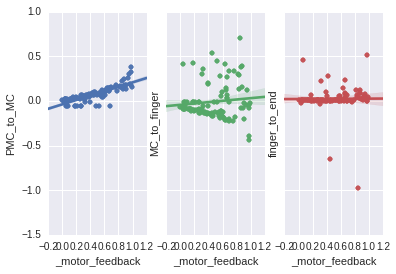

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_feedback'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

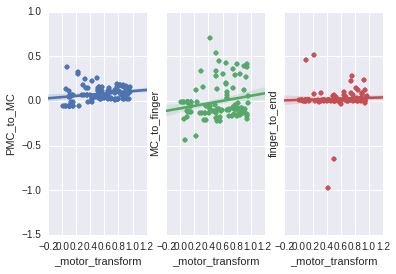

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_transform'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

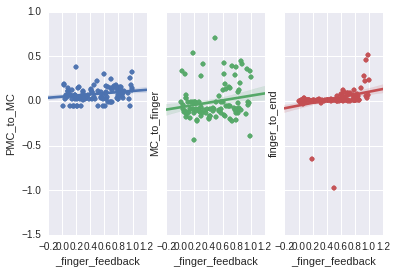

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_finger_feedback'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

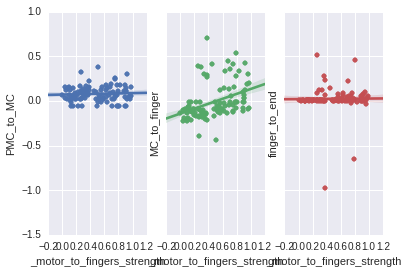

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_to_fingers_strength'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)